In [1]:
import pandas as pd
import pickle
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
folder_name = "Sat_Feb_17_19_05_30_2018"

In [4]:
textdata = pickle.load(open(folder_name+'/extracted_data.p','rb'))

In [5]:
year = [i.split("-")[0] for i in textdata['date']]
textdata['year'] = year

# number of papers w.r.t year

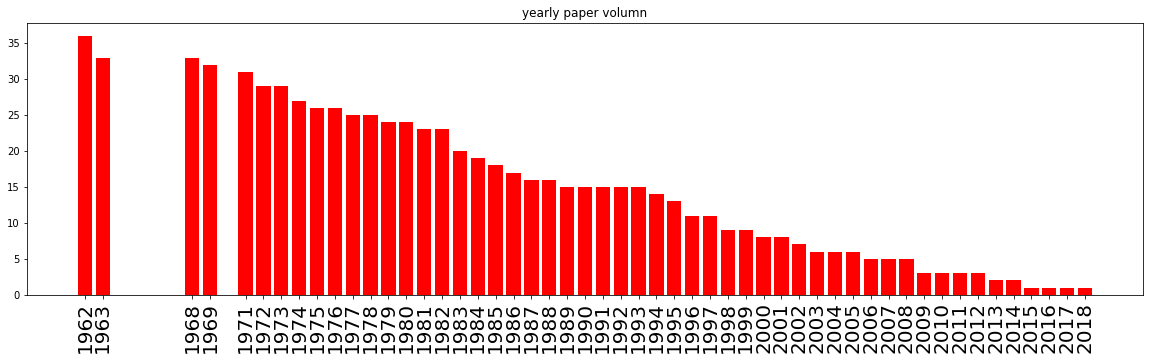

In [6]:
x1=textdata['year'].value_counts().sort_index().index
x1=[int(i) for i in x1]
y1=textdata['year'].value_counts().values

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(x1, y1, color='r')
ax.set_xticks(np.array(x1))
ax.set_xticklabels(x1,rotation=90,size=20)
ax.set_title("yearly paper volumn")
plt.show()

# top 15 journals w.r.t number of papers

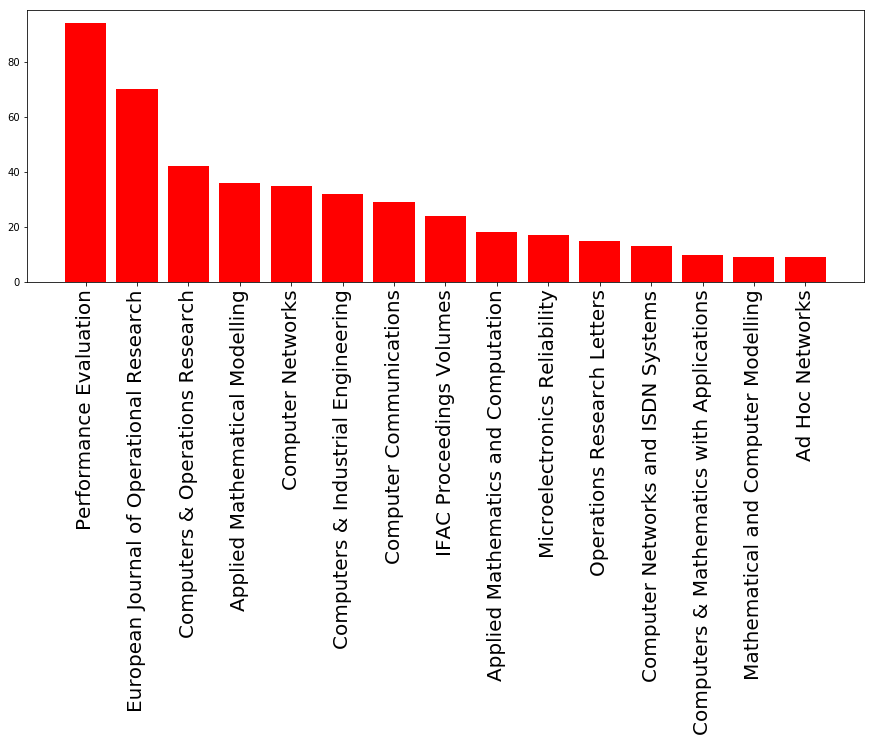

In [7]:
y1=textdata['journal_or_book_name'].value_counts().values[:15]
x1=range(len(y1))
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x1, y1, color='r')
ax.set_xticks(np.array(x1))
ax.set_xticklabels(textdata['journal_or_book_name'].value_counts()[:15].index,rotation=90,size=20)
plt.show()

# top 5 journals w.r.t total number of citations

In [8]:
temp = textdata.groupby(['journal_or_book_name'])['citation_count'].mean()
temp = pd.DataFrame(temp.sort_values(ascending=0))
temp[:5]

,citation_count
journal_or_book_name,
"Nuclear Instruments and Methods in Physics Research Section A: Accelerators, Spectrometers, Detectors and Associated Equipment",576.0
Pervasive and Mobile Computing,74.0
European Economic Review,73.0
Journal of Manufacturing Systems,57.0
Journal of Mathematical Psychology,56.0


# top 5 journals w.r.t average number of citations

In [9]:
temp = textdata.groupby(['journal_or_book_name'])['citation_count'].sum()
temp = pd.DataFrame(temp.sort_values(ascending=0))
temp[:5]

,citation_count
journal_or_book_name,
European Journal of Operational Research,1651.0
Performance Evaluation,1484.0
Computers & Operations Research,715.0
Applied Mathematical Modelling,632.0
"Nuclear Instruments and Methods in Physics Research Section A: Accelerators, Spectrometers, Detectors and Associated Equipment",576.0


In [10]:
authors = {}
for idx,author_list in enumerate(textdata['authors']):
    for author in author_list:
        if author in authors:
            if len(author)>1:
                authors[author]['num_papers']+=1
                authors[author]['total_citations']+=textdata['citation_count'][idx]
                if textdata['citation_count'][idx]>authors[author]['citation']:
                    authors[author]['most_cited_paper'] = textdata['title'][idx]
        else:
            if len(author)>1:
                authors[author] = {'num_papers':1,'total_citations':textdata['citation_count'][idx],\
                                   "most_cited_paper":textdata['title'][idx],'citation':textdata['citation_count'][idx]}
authors = pd.DataFrame(authors).T

In [11]:
authors['mean_citations'] = authors['total_citations']/authors['num_papers']

# top 5 authors w.r.t total numebr of papers

In [12]:
authors.sort_values(['num_papers'],ascending=0)[:5]

,citation,most_cited_paper,num_papers,total_citations,mean_citations
"Bruneel, Herwig",12,A general treatment of discrete-time buffers w...,34,528,15.5294
"Ke, Jau-Chuan",14,A batch arrival retrial queue with general ret...,17,252,14.8235
"Fiems, Dieter",12,Discrete-time queues with generally distribute...,12,146,12.1667
"Walraevens, Joris",9,Performance analysis of a GI-Geo-1 buffer with...,11,125,11.3636
"Choudhury, Gautam",31,A batch arrival retrial queue with general ret...,10,302,30.2


# top 5 authors w.r.t total numebr of citations

In [13]:
authors.sort_values(['total_citations'],ascending=0)[:5]

,citation,most_cited_paper,num_papers,total_citations,mean_citations
"Zhou, B.",576,The upgraded DØ detector,2,1152,576
"Zhang, X.",11,The upgraded DØ detector,2,587,293.5
"Hanlet, P.",576,The upgraded DØ detector,1,576,576
"Jaffré, M.",576,The upgraded DØ detector,1,576,576
"Sumowidagdo, S.",576,The upgraded DØ detector,1,576,576


# top 5 authors w.r.t average numebr of citations

In [14]:
authors.sort_values(['mean_citations'],ascending=0)[:5]

,citation,most_cited_paper,num_papers,total_citations,mean_citations
"Dvornikov, O.",576,The upgraded DØ detector,1,576,576
"Fox, H.",576,The upgraded DØ detector,1,576,576
"Fleck, I.",576,The upgraded DØ detector,1,576,576
"Fleuret, F.",576,The upgraded DØ detector,1,576,576
"Flores, R.",576,The upgraded DØ detector,1,576,576


# ... to be continued